In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd

data_male=[12,7,7,10,8,10,11,9,9,13,4,9,12,11,9,9,7,12,10,13,11,10,6,12,11,9,10,12,8,9,13,10,9,7,10,7,10,8,11,10,11,7,15,8,9,9,11,13,10,13]
data_female=[11,10,11,10,11,12,12,10,9,9,9,10,8,7,12,9,7,8,9,8,7,7,9,9,12,10,9,13,9,9,10,9,6,12,8,11,8,8,11,12,9,10,11,14,12,7,11,10,9,11]

data = {
    'Gender': ['Male']*len(data_male) + ['Female']*len(data_female),
    'Time_Spent': data_male + data_female
}
df_data = pd.DataFrame(data)

data_male_pd=pd.Series(data_male)
data_female_pd=pd.Series(data_female)
n=data_male_pd.count()


# 1 
The study will partake in finding whether the mean of the female and male college students is the same in terms of hours talking on the cell phone.

# Null Hypothesis:'
    The time spent talking on the cell phone is the same:
    mean_male=mean_female

# Alternative Hypothesis:
    The time spent talking on the cell phone is different:
    mean_male≠mean_female

# Rationale:
This will be conducted by using the two-sample t-test to see whether there are significant difference in the time spent.

The test will compare the data set of both the male and female to see whether there are significant difference based on logic and statistics.

To conduct the test:
1. The table provided will be used as the data set for the male and female
2. Compute the t-test along with the associated p-value
3. Compare the p-value with the standard alpha=0.05 to see whether to reject the null hypothesis or not.

   

# 2
To check whether the data set has an equal variances: Use Levene's test first to check if the p-value will be grater than 0.05 (Meaning equal variances) or less (Meaning unequal variances)

Equal variances.

Therefore, since the variances are equal the t-test will have equal_var=True
The t-value is 0.30394907866566184 and the p-value is 0.7618111039906375
Since 0.7618111039906375 is greater than alpha=0.05, the null hypothesis will not be rejected due to lack of evidence


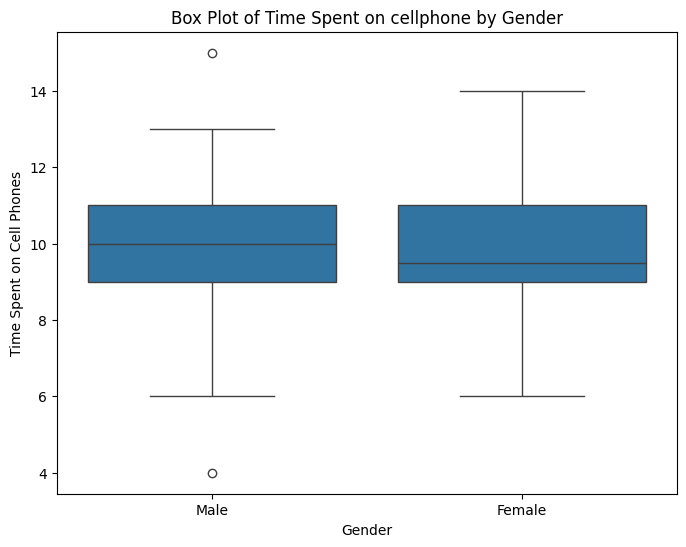

In [11]:
levene_stat, levene_p_val = stats.levene(data_male,data_female)

if levene_p_val > 0.05:
    print("Equal variances.\n")
else:
    print("Unequal variances.\n")

print("Therefore, since the variances are equal the t-test will have equal_var=True")

plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Time_Spent', data=df_data)
plt.title('Box Plot of Time Spent on cellphone by Gender')
plt.ylabel('Time Spent on Cell Phones')
plt.xlabel('Gender')

t_stat, p_val = stats.ttest_ind(data_male,data_female, equal_var=True)

print(f"The t-value is {t_stat} and the p-value is {p_val}")

print(f"Since {p_val} is greater than alpha=0.05, the null hypothesis will not be rejected due to lack of evidence")

The Levene's test resulted into equal variances, therefore the t-test conducted will have equal_var set to True.

With this the values are:
    1. T-value = 0.303949
    2. P-value = 0.761811

Therefore, since 0.761811 > 0.05, the null hypothesis will not be rejected due to lack of evidence.

# Outlier issue

Since the male data set has an outlier of 4 and 15, we'll be checking whether this significantly affects the result of the p value


In [12]:
data_male_no_outliers = [x for x in data_male if x != 4 and x != 15]

t_stat_no_outliers, p_val_no_outliers = stats.ttest_ind(data_male_no_outliers, data_female)

print("T-statistic (without outliers):", t_stat_no_outliers)
print("P-value (without outliers):", p_val_no_outliers)

print("T-statistic (with outliers):", t_stat)
print("P-value (with outliers):", p_val)



T-statistic (without outliers): 0.36074614928825416
P-value (without outliers): 0.7190818116406611
T-statistic (with outliers): 0.30394907866566184
P-value (with outliers): 0.7618111039906375


Since the difference are significantly small, this doesn't change the result nor the recommendation to the researchers.

Also, since the outliers are a genuine part of the dataset, then the following results will include the outliers for a more accurate result.

# Recommendation to the Researchers

The current data set does not have significant difference thus the researches should conclude that there are no significant difference in phone usage between the male and female.

However, this doesn't prove that the mean of both male and female is the same.


# 3. Descriptive Statistical Summaries for Male and Female

In [4]:


dp_summary_male={
    'Valid': data_male_pd.count(),
    'Mode': data_male_pd.mode().tolist(),
    'Median': data_male_pd.median(),
    'Mean': data_male_pd.mean(),
    'Std. Deviation': data_male_pd.std(),
    'Variance': data_male_pd.var(),
    'Skewness': data_male_pd.skew(),
    'Std. Error of Skewness': np.sqrt(((6)*(n)*(n-1))/((n-2)*(n+1)*(n+3))),
    'Kurtosis': data_male_pd.kurt(),
    'Std. Error of Kurtosis': np.sqrt(24 / n),
    'Minimum': data_male_pd.min(),
    'Maximum': data_male_pd.max(),
    '25th Percentile': data_male_pd.quantile(0.25),
    '50th Percentile': data_male_pd.quantile(0.50),
    '75th Percentile': data_male_pd.quantile(0.75),
    '90th Percentile': data_male_pd.quantile(0.90),
    '95th Percentile': data_male_pd.quantile(0.95),
}

dp_summary_female={
    'Valid': data_female_pd.count(),
    'Mode': data_female_pd.mode().tolist(),
    'Median': data_female_pd.median(),
    'Mean': data_female_pd.mean(),
    'Std. Deviation': data_female_pd.std(),
    'Variance': data_female_pd.var(),
    'Skewness': data_female_pd.skew(),
    'Std. Error of Skewness': np.sqrt(((6)*(n)*(n-1))/((n-2)*(n+1)*(n+3))),
    'Kurtosis': data_female_pd.kurt(),
    'Std. Error of Kurtosis': np.sqrt(24 / n),
    'Minimum': data_female_pd.min(),
    'Maximum': data_female_pd.max(),
    '25th Percentile': data_female_pd.quantile(0.25),
    '50th Percentile': data_female_pd.quantile(0.50),
    '75th Percentile': data_female_pd.quantile(0.75),
    '90th Percentile': data_female_pd.quantile(0.90),
    '95th Percentile': data_female_pd.quantile(0.95),
}

descriptive_df_male = pd.DataFrame(dp_summary_male.items(), columns=['Measure_Male', 'Value'])
descriptive_df_female = pd.DataFrame(dp_summary_female.items(), columns=['Measure_Female', 'Value'])

descriptive_df_female.style.hide(axis="index")


Measure_Female,Value
Valid,50
Mode,[9]
Median,9.500000
Mean,9.700000
Std. Deviation,1.775686
Variance,3.153061
Skewness,0.134412
Std. Error of Skewness,0.336601
Kurtosis,-0.441792
Std. Error of Kurtosis,0.692820


In [5]:
descriptive_df_male.style.hide(axis="index")


Measure_Male,Value
Valid,50
Mode,"[9, 10]"
Median,10.000000
Mean,9.820000
Std. Deviation,2.154161
Variance,4.640408
Skewness,-0.114676
Std. Error of Skewness,0.336601
Kurtosis,0.177262
Std. Error of Kurtosis,0.692820


# 4. 95% confidence interval for the population mean of each gender category & 95% confidence interval for the difference between the means of the two populations

In [6]:
mean_male = np.mean(data_male)
std_male = np.std(data_male, ddof=1)  
n_male = len(data_male)

mean_female = np.mean(data_female)
std_female = np.std(data_female, ddof=1)
n_female = len(data_female)

df = n_male + n_female - 2  
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df)

se_male = std_male / np.sqrt(n_male)
se_female = std_female / np.sqrt(n_female)

ci_male = (mean_male - t_critical * se_male, mean_male + t_critical * se_male)
ci_female = (mean_female - t_critical * se_female, mean_female + t_critical * se_female)

mean_diff = mean_male - mean_female
se_diff = np.sqrt((std_male**2/n_male) + (std_female**2/n_female))
ci_diff = (mean_diff - t_critical * se_diff, mean_diff + t_critical * se_diff)

print(f"95% Confidence Interval for Males: {ci_male}")
print(f"95% Confidence Interval for Females: {ci_female}")
print(f"95% Confidence Interval for the Difference in Means: {ci_diff}")

95% Confidence Interval for Males: (np.float64(9.215443256712721), np.float64(10.42455674328728))
95% Confidence Interval for Females: (np.float64(9.201660651026579), np.float64(10.19833934897342))
95% Confidence Interval for the Difference in Means: (np.float64(-0.6634736514965714), np.float64(0.9034736514965734))


# 5 Discussion
Although the current data set provides valuable initial insights, having larger sample size will solidify and generalize the phone usage between the male and female. With larger sample size, it will yield a more accurate conclusion about the study.



Normality Test (Shapiro-Wilk):
Male: W = 0.9746539794869001, p-value = 0.3539889622001458
Female: W = 0.9638767847871548, p-value = 0.12919719507959687

Levene's Test for Homogeneity of Variances:
Statistic = 0.6943460393935098, p-value = 0.4067163398636352

Two Independent Samples t-test:
t-statistic = 0.30394907866566184, p-value = 0.7618111039906375


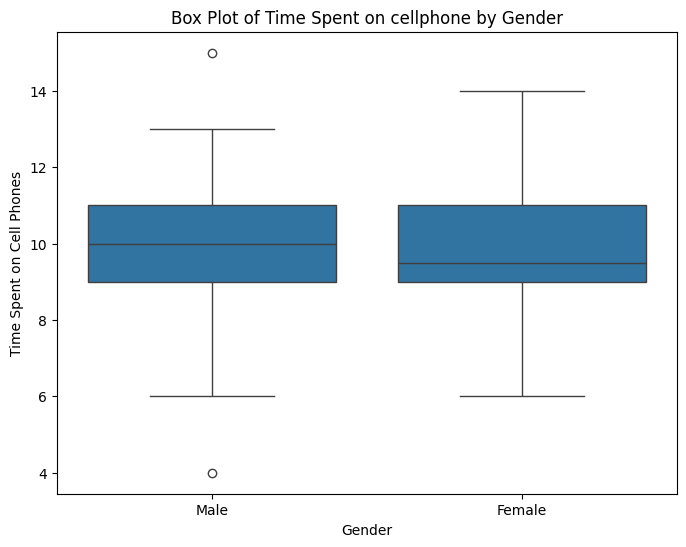

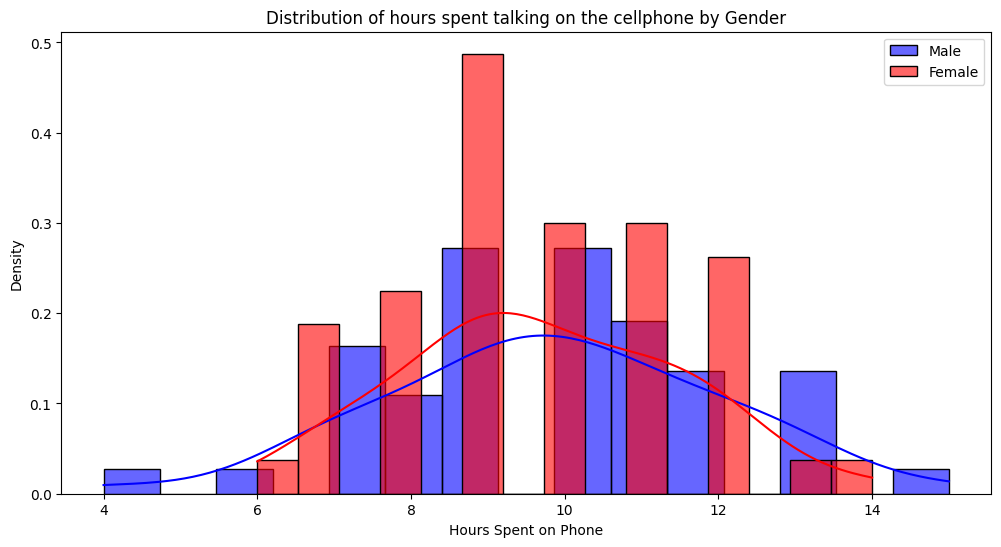

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

shapiro_male = stats.shapiro(data_male)
shapiro_female = stats.shapiro(data_female)

print("Normality Test (Shapiro-Wilk):")
print(f"Male: W = {shapiro_male.statistic}, p-value = {shapiro_male.pvalue}")
print(f"Female: W = {shapiro_female.statistic}, p-value = {shapiro_female.pvalue}")

print("\nLevene's Test for Homogeneity of Variances:")
print(f"Statistic = {levene_stat}, p-value = {levene_p_val}")

print("\nTwo Independent Samples t-test:")
print(f"t-statistic = {t_stat}, p-value = {p_val}")

plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Time_Spent', data=df_data)
plt.title('Box Plot of Time Spent on cellphone by Gender')
plt.ylabel('Time Spent on Cell Phones')
plt.xlabel('Gender')


plt.figure(figsize=(12, 6))
sns.histplot(data_male, kde=True, color='blue', label='Male', stat='density', bins=15, alpha=0.6)
sns.histplot(data_female, kde=True, color='red', label='Female', stat='density', bins=15, alpha=0.6)
plt.title('Distribution of hours spent talking on the cellphone by Gender')
plt.xlabel('Hours Spent on Phone')
plt.ylabel('Density')
plt.legend()
plt.show()
